<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Italy_deaths_peak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
new_deaths_raw = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/new_deaths.csv", index_col='date')
new_deaths_raw["Italy"].tail(3)

date
2020-03-22    795.0
2020-03-23    649.0
2020-03-24    601.0
Name: Italy, dtype: float64

In [0]:
Italy_lockdown = '2020-03-10'
Italy_closes_schools = '2020-03-05'
Italy_max = '2020-03-22'

In [0]:
TIPPING_POINT = 10

In [0]:
list_countries = ['Italy']

In [0]:
new_deaths = {}
for country in list_countries:
  new_deaths[country] = new_deaths_raw[country][new_deaths_raw[country] > TIPPING_POINT]

In [7]:
new_deaths["Italy"].tail(3)

date
2020-03-22    795.0
2020-03-23    649.0
2020-03-24    601.0
Name: Italy, dtype: float64

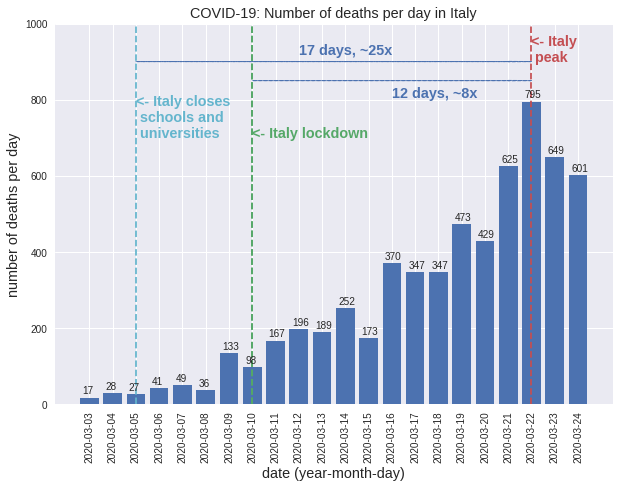

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(new_deaths['Italy'].index, new_deaths['Italy'])
for i, val in enumerate(new_deaths['Italy']):
  ax.text(i-0.3, val+10, str(int(val)))
plt.axvline(Italy_closes_schools, color='C5', linestyle='dashed')
plt.axvline(Italy_lockdown, color='C1', linestyle='dashed')
plt.axvline(Italy_lockdown, color='C1', linestyle='dashed')
plt.axvline(Italy_max, color='C2', linestyle='dashed')
plt.arrow(2, 900, 17, 0, head_width=1, head_length=1, linewidth=1, linestyle='dashed', color='C6', length_includes_head=True)
plt.arrow(7, 850, 12, 0, head_width=1, head_length=1, linewidth=1, linestyle='dashed', color='C6', length_includes_head=True)
plt.annotate('<- Italy closes\n schools and\n universities', (Italy_closes_schools,700.0), color='C5', fontsize='x-large', fontweight='bold')
plt.annotate('<- Italy lockdown', (Italy_lockdown,700.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('<- Italy\n peak', (Italy_max,900.0), color='C2', fontsize='x-large', fontweight='bold')
plt.annotate('17 days, ~25x', (9, 920), color='C6', fontsize='x-large', fontweight='bold')
plt.annotate('12 days, ~8x', (13, 805), color='C6', fontsize='x-large', fontweight='bold')
plt.xticks(rotation=90)
plt.ylim(0,1000)
ax.set_title(f'COVID-19: Number of deaths per day in Italy', fontsize='x-large')
ax.set_xlabel(f'date (year-month-day)', fontsize='x-large')
ax.set_ylabel(f'number of deaths per day', fontsize='x-large')
plt.show()